In [1]:
import pandas as pd
import plotnine as p9
import numpy as np

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [4]:
OAK_150k=pd.read_csv(data_dir1+'barnyard_OAK150kali1/count_summary.csv',header=0)

In [5]:
OAK_150k_toConcat=OAK_150k[['cell_bc','call','Read_count','n_genes_by_counts','total_counts','exp_group']]

In [6]:
OAK_150k_toConcat.columns=['cell_bc','species','read_count','n_genes_by_counts','n_UMI_counts','exp_group']

In [7]:
#subset the OAK data to the median sequencing depth of around 15k reads per cell
OAK_150k_toConcat[(OAK_150k_toConcat['species']=='mm10') & (OAK_150k_toConcat['read_count']>12500)]['read_count'].median()

14807.0

In [8]:
df_OAK_nGene=OAK_150k_toConcat[(OAK_150k_toConcat['species']=='mm10') & (OAK_150k_toConcat['read_count']>12500)]['n_genes_by_counts'].to_frame(name='nGene')

In [9]:
df_OAK_nGene['exp']='OAK_3T3'

In [10]:
PariedSeq_Fig1g=pd.read_csv(data_dir2+'Paired_seq_data/41594_2019_323_MOESM7_ESM_Fig1g.csv',header=1)

In [11]:
df_sciRNAseq_nGene=PariedSeq_Fig1g['sci-RNA-seq NIH/3T3'].to_frame(name='nGene')
df_sciRNAseq_nGene['exp']='sciRNAseq_3T3'

In [12]:
df_SPLiTseq_nGene=PariedSeq_Fig1g['SPLiT-seq NIH/3T3'].to_frame(name='nGene')
df_SPLiTseq_nGene['exp']='SPLiTseq_3T3'

In [13]:
df_Pairedseq_nGene=PariedSeq_Fig1g['Paired-seq NIH/3T3'].to_frame(name='nGene')
df_Pairedseq_nGene['exp']='Paired_seq_3T3'

In [14]:
df_sciCAR_nGene=PariedSeq_Fig1g['sci-CAR NIH/3T3'].to_frame(name='nGene')
df_sciCAR_nGene['exp']='sci-CAR_3T3'

In [15]:
df_nGene=pd.concat([df_OAK_nGene,df_sciRNAseq_nGene,df_SPLiTseq_nGene,df_Pairedseq_nGene,df_sciCAR_nGene],ignore_index=True)

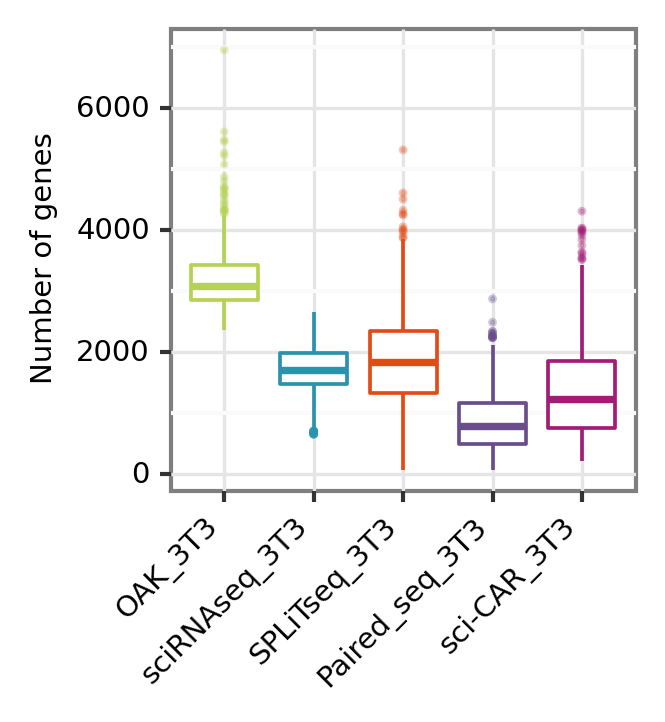

<ggplot: (2932097848055)>

In [16]:
plot=p9.ggplot(data=df_nGene,
               mapping=p9.aes(x='exp',y='nGene',color='exp')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['OAK_3T3','sciRNAseq_3T3','SPLiTseq_3T3','Paired_seq_3T3','sci-CAR_3T3']) \
+ p9.scale_color_manual(values = {'OAK_3T3':'#B5D251','SPLiTseq_3T3':'#E24B15','sciRNAseq_3T3':'#2992AD','Paired_seq_3T3':'#6A4E8C','sci-CAR_3T3':'#A41B76'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of genes') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(2,2)) # inch
plotsave

In [17]:
plot=p9.ggplot(data=df_nGene,
               mapping=p9.aes(x='exp',y='nGene',color='exp')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['OAK_3T3','sciRNAseq_3T3','SPLiTseq_3T3','Paired_seq_3T3','sci-CAR_3T3']) \
+ p9.scale_color_manual(values = {'OAK_3T3':'#B5D251','SPLiTseq_3T3':'#E24B15','sciRNAseq_3T3':'#2992AD','Paired_seq_3T3':'#6A4E8C','sci-CAR_3T3':'#A41B76'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of genes') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(2,2)) # inch
fig=plotsave.draw()
fig.set_size_inches(2, 2)
fig.savefig('NIH3T3_nGene_comp.svg',format='svg',dpi=300,bbox_inches='tight')  

In [17]:
df_nGene.to_csv(data_dir1+'Fig1g.csv',header=True,index=False)

In [18]:
df_OAK_nUMI=OAK_150k_toConcat[(OAK_150k_toConcat['species']=='mm10') & (OAK_150k_toConcat['read_count']>12500)]['n_UMI_counts'].to_frame(name='nUMI')

In [19]:
df_OAK_nUMI['exp']='OAK_3T3'

In [20]:
PariedSeq_Fig1f=pd.read_csv(data_dir2+'Paired_seq_data/41594_2019_323_MOESM7_ESM_Fig1f.csv',header=1)

In [21]:
df_sciRNAseq_nUMI=PariedSeq_Fig1f['sci-RNA-seq NIH/3T3'].to_frame(name='nUMI')
df_sciRNAseq_nUMI['exp']='sciRNAseq_3T3'

In [22]:
df_SPLiTseq_nUMI=PariedSeq_Fig1f['SPLiT-seq NIH/3T3'].to_frame(name='nUMI')
df_SPLiTseq_nUMI['exp']='SPLiTseq_3T3'

In [23]:
df_Pairedseq_nUMI=PariedSeq_Fig1f['Paired-seq NIH/3T3'].to_frame(name='nUMI')
df_Pairedseq_nUMI['exp']='Paired_seq_3T3'

In [24]:
df_sciCAR_nUMI=PariedSeq_Fig1f['sci-CAR NIH/3T3'].to_frame(name='nUMI')
df_sciCAR_nUMI['exp']='sci-CAR_3T3'

In [25]:
df_nUMI=pd.concat([df_OAK_nUMI,df_sciRNAseq_nUMI,df_SPLiTseq_nUMI,df_Pairedseq_nUMI,df_sciCAR_nUMI],ignore_index=True)

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 18 rows containing non-finite values.


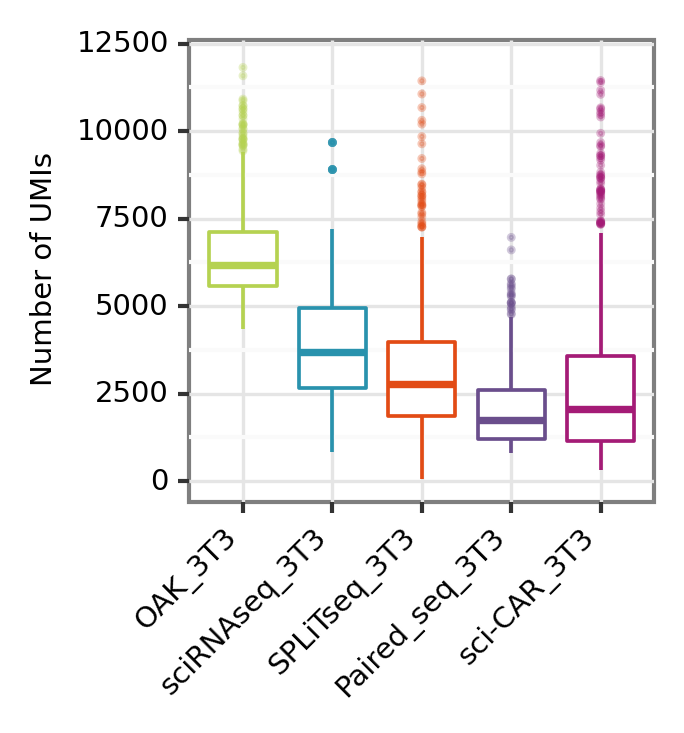

<ggplot: (2932097845733)>

In [26]:
plot=p9.ggplot(data=df_nUMI,
               mapping=p9.aes(x='exp',y='nUMI',color='exp')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['OAK_3T3','sciRNAseq_3T3','SPLiTseq_3T3','Paired_seq_3T3','sci-CAR_3T3']) \
+ p9.scale_color_manual(values = {'OAK_3T3':'#B5D251','SPLiTseq_3T3':'#E24B15','sciRNAseq_3T3':'#2992AD','Paired_seq_3T3':'#6A4E8C','sci-CAR_3T3':'#A41B76'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of UMIs') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.ylim(0,12000) \
+ p9.theme(figure_size=(2,2)) # inch
plotsave

In [28]:
plot=p9.ggplot(data=df_nUMI,
               mapping=p9.aes(x='exp',y='nUMI',color='exp')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['OAK_3T3','sciRNAseq_3T3','SPLiTseq_3T3','Paired_seq_3T3','sci-CAR_3T3']) \
+ p9.scale_color_manual(values = {'OAK_3T3':'#B5D251','SPLiTseq_3T3':'#E24B15','sciRNAseq_3T3':'#2992AD','Paired_seq_3T3':'#6A4E8C','sci-CAR_3T3':'#A41B76'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of UMIs') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.ylim(0,12000) \
+ p9.theme(figure_size=(2,2)) # inch
fig=plotsave.draw()
fig.set_size_inches(2, 2)
fig.savefig('NIH3T3_nUMI_comp.svg',format='svg',dpi=300,bbox_inches='tight')  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 18 rows containing non-finite values.


In [27]:
df_nUMI.to_csv(data_dir1+'SupFig1k.csv',header=True,index=False)

In [29]:
df_nGene['exp'].value_counts()

sciRNAseq_3T3     868
SPLiTseq_3T3      868
Paired_seq_3T3    868
sci-CAR_3T3       868
OAK_3T3           691
Name: exp, dtype: int64

In [30]:
df_nUMI['exp'].value_counts()

sciRNAseq_3T3     868
SPLiTseq_3T3      868
Paired_seq_3T3    868
sci-CAR_3T3       868
OAK_3T3           691
Name: exp, dtype: int64